# Deep Learning Basics
## Multilayer Perceptron/ Feed Forward Architecture
### Implementing a 3 LayerNeural Networks from Scratch

**Learning Goals**
- Understanding the multilayer Perceptron (MLP) architecture
- Understanding Forward Propagation and Backpropagation, Loss, Activation Function
- Making prediction
- Checking classification performance on different datasets

$\textbf{1 Layer Network}$
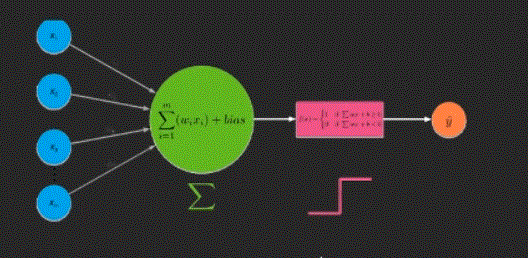
- Simplest Unit Perceptron
- Only one Output Unit
- No Hidden layers
- Input is not counted in layers

$\textbf{2 Layer Network}$
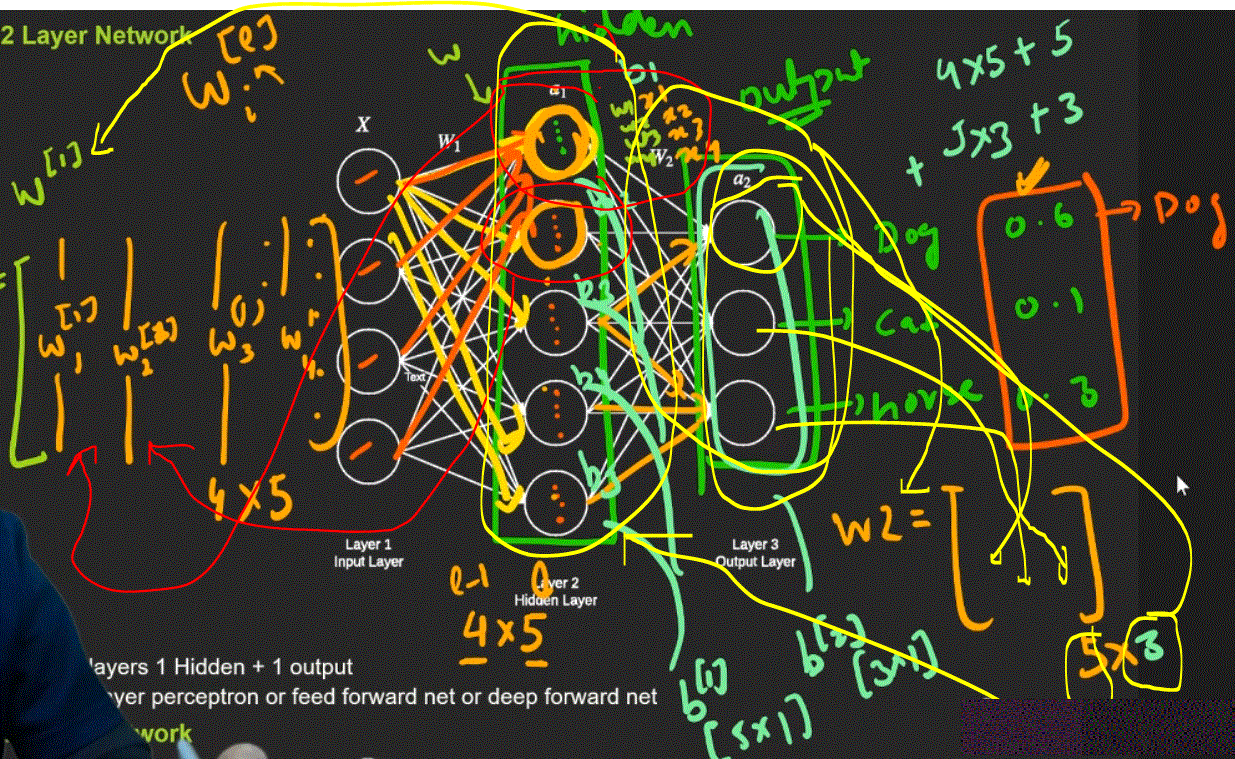
-  Multi-layer perceptron or feed forward net or deep forward net

$\textbf{Similarly, We Can Have 3,4... Multiple Layer Network}$ 

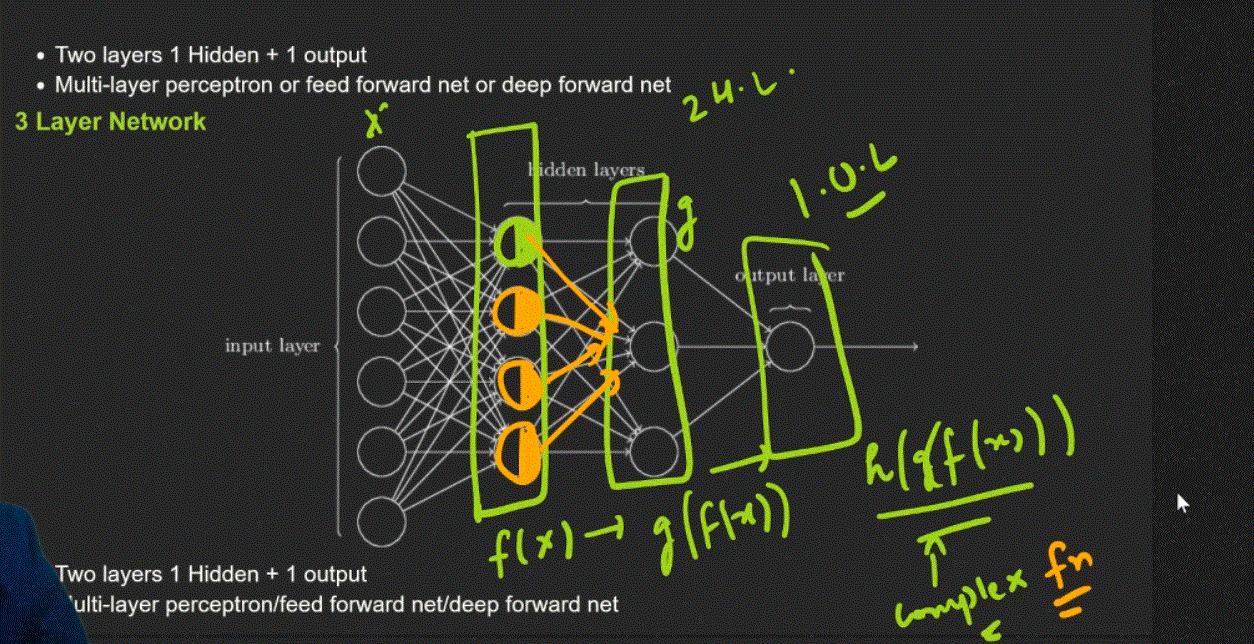

### Understanding Forward Propagation
- How to pass one example
- How to pass multiples examples(Vectorization)


###  Implementation 

In [1]:
import numpy as np

In [2]:
input_size = 3 # no of features
layers = [4,3] # no of neurons in 1st and 2nd layer
output_size = 2

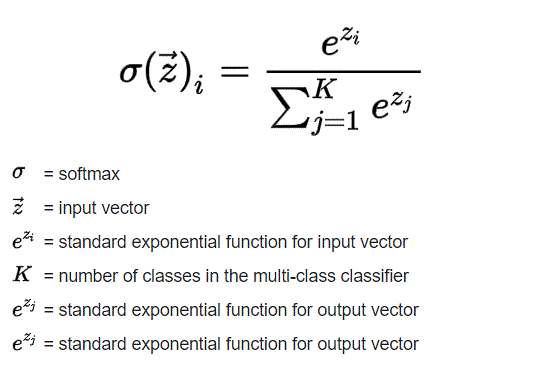

In [3]:
a = np.array([[1,2,3], [2,2,2]])
print(np.sum(a))
print(np.sum(a, axis = 0, keepdims = True))
print(np.sum(a, axis = 1,keepdims = True))
print()
print(np.sum(a, axis = 1))

12
[[3 4 5]]
[[6]
 [6]]

[6 6]


In [4]:
def softmax(A):
    e_pa = np.exp(A) # vector
    ans = e_pa / np.sum(e_pa, axis = 1, keepdims = True)
    return ans
# softmax makes it into the range of [0,1]

### Building Model

In [89]:
class NeuralNetwork:
    
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        model = {}
        # First Layer
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0])) # row vector
        
        # Second Layer
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1])) # row vector
        

        # Third Layer ie. output layer
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size)) # row vector
        
        self.model = model
    
    def forward(self, x):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2 , b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(x,W1) + b1 #Activation 
        a1 = np.tanh(z1) # activation function tanh, tanh transforms into rnge of -1 to 1
        #a1 can be used for sigmiod as well
        
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_) # a1:Activation from 1st hidden layer a2: Activation from 2nd hidden layer y_: from output layer
        return y_ # final output (m X classes)
        
    def backward(self, x, y, learning_rate = 0.001):    
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2 , b3 = self.model['b1'], self.model['b2'], self.model['b3']
        a1,a2,y_ = self.activation_outputs
        #y_  #output produced by given model
        m = x.shape[0]
        delta3 = y_ - y # y is matrix contaning one hot vector for each examples
        # using delta3 we can update our weights in final layer
        
        
        # w1: [n, h1], w2: [h1,h2], w3: [h2, ho], delta of w will also have same shapes
        # when we will back propagate we cn make changes to shapes for vectorization
        
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis = 0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3, W3.T) # a2 = tanh(z2) derivative of activation (1 - a^2)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis = 0)
        
        delta1 = (1-np.square(a1))* np.dot(delta2, W2.T)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1,axis = 0)
        
        
        # update model parameter using gradient descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

$Z = \sum{}W_{i}X_{i} + b$
- 

In [90]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

### Constructing One Hot Vector
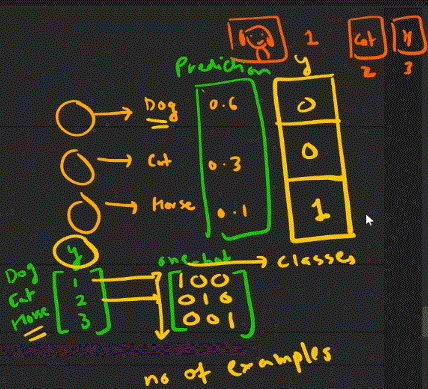

In [91]:
# tensorflow have inbuilt method for onehot called tf.onehot
def one_hot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    
#     if y = 2 then m[0 0 0 
#                     0 1 0
#                     0 0 0]
    return y_oht

In [92]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [93]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [94]:
# y_oht = one_hot(Y, 2)
# print(y_oht)

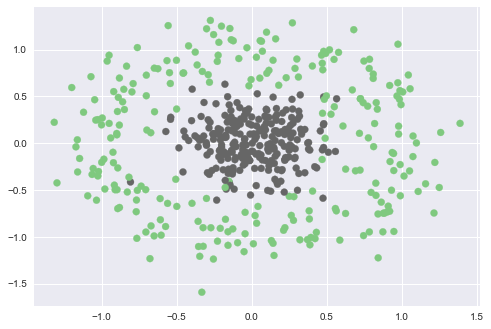

In [95]:
plt.style.use('seaborn')
plt.scatter(X[:,0], X[:,1], c = Y, cmap =plt.cm.Accent)
plt.show()

In [96]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [97]:
model.forward([X[0]])

array([[0.52335135, 0.47664865]])

In [98]:
model.forward(X)

array([[0.52335135, 0.47664865],
       [0.53144257, 0.46855743],
       [0.57726974, 0.42273026],
       [0.28383524, 0.71616476],
       [0.63877346, 0.36122654],
       [0.50841174, 0.49158826],
       [0.37442957, 0.62557043],
       [0.55888858, 0.44111142],
       [0.5711453 , 0.4288547 ],
       [0.3442594 , 0.6557406 ],
       [0.49498476, 0.50501524],
       [0.4336066 , 0.5663934 ],
       [0.36449759, 0.63550241],
       [0.37609645, 0.62390355],
       [0.51318589, 0.48681411],
       [0.40138333, 0.59861667],
       [0.4729603 , 0.5270397 ],
       [0.6071061 , 0.3928939 ],
       [0.45184873, 0.54815127],
       [0.43976498, 0.56023502],
       [0.48953223, 0.51046777],
       [0.55503744, 0.44496256],
       [0.58933294, 0.41066706],
       [0.64427947, 0.35572053],
       [0.45240396, 0.54759604],
       [0.56502192, 0.43497808],
       [0.5600346 , 0.4399654 ],
       [0.47502227, 0.52497773],
       [0.41733084, 0.58266916],
       [0.70560946, 0.29439054],
       [0.

In [99]:
model.summary()
#W1 (2, 10) size of hidden layer 1
# A1 (500, 10) #no. of outputs produced by the layer 1
# W2 (10, 4) size of hidden layer 2
# A2 (500, 4)
# W3 (4, 2) size of hidden layer 3
# y_ (500, 2)

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
Y_  (500, 2)


In [100]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [101]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

Epoch 455 Loss 0.0399
Epoch 456 Loss 0.0399
Epoch 457 Loss 0.0398
Epoch 458 Loss 0.0398
Epoch 459 Loss 0.0398
Epoch 460 Loss 0.0398
Epoch 461 Loss 0.0398
Epoch 462 Loss 0.0398
Epoch 463 Loss 0.0398
Epoch 464 Loss 0.0398
Epoch 465 Loss 0.0397
Epoch 466 Loss 0.0397
Epoch 467 Loss 0.0397
Epoch 468 Loss 0.0397
Epoch 469 Loss 0.0397
Epoch 470 Loss 0.0397
Epoch 471 Loss 0.0397
Epoch 472 Loss 0.0397
Epoch 473 Loss 0.0397
Epoch 474 Loss 0.0396
Epoch 475 Loss 0.0396
Epoch 476 Loss 0.0396
Epoch 477 Loss 0.0396
Epoch 478 Loss 0.0396
Epoch 479 Loss 0.0396
Epoch 480 Loss 0.0396
Epoch 481 Loss 0.0396
Epoch 482 Loss 0.0396
Epoch 483 Loss 0.0396
Epoch 484 Loss 0.0395
Epoch 485 Loss 0.0395
Epoch 486 Loss 0.0395
Epoch 487 Loss 0.0395
Epoch 488 Loss 0.0395
Epoch 489 Loss 0.0395
Epoch 490 Loss 0.0395
Epoch 491 Loss 0.0395
Epoch 492 Loss 0.0395
Epoch 493 Loss 0.0394
Epoch 494 Loss 0.0394
Epoch 495 Loss 0.0394
Epoch 496 Loss 0.0394
Epoch 497 Loss 0.0394
Epoch 498 Loss 0.0394
Epoch 499 Loss 0.0394


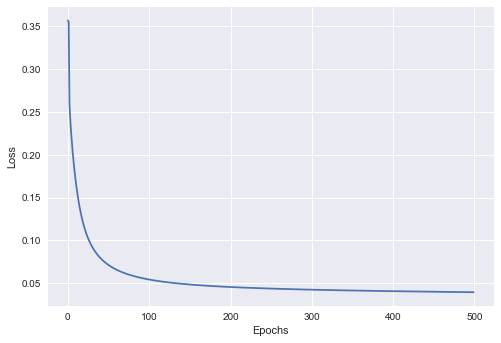

In [102]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [103]:
# finding accuracy
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

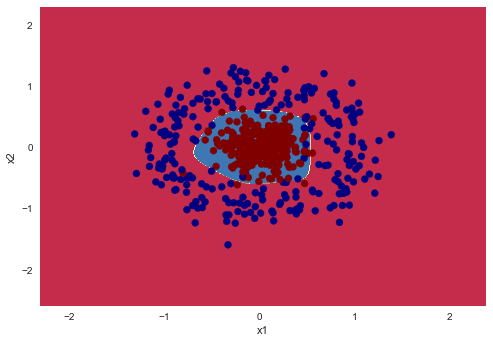

In [104]:
plot_decision_boundary(lambda x: model.predict(x), X,Y)

In [105]:
outputs = model.predict(X)

In [106]:
outputs == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [107]:
training_accuracy = np.sum(outputs == Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.0000


### XOR Dataset
- x1 x2 y
- 0  0  0
- 0  1  1
- 1  0  1
- 1  1  0

- It is not linearly saperable

In [108]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
Y = np.array([0,1,1,0])

In [109]:
losses = train(X,Y, model,500, 0.1)

Epoch 0 Loss 2.6112
Epoch 1 Loss 1.3278
Epoch 2 Loss 0.9747
Epoch 3 Loss 0.8254
Epoch 4 Loss 0.1254
Epoch 5 Loss 0.0743
Epoch 6 Loss 0.0619
Epoch 7 Loss 0.0543
Epoch 8 Loss 0.0487
Epoch 9 Loss 0.0442
Epoch 10 Loss 0.0406
Epoch 11 Loss 0.0375
Epoch 12 Loss 0.0349
Epoch 13 Loss 0.0327
Epoch 14 Loss 0.0306
Epoch 15 Loss 0.0288
Epoch 16 Loss 0.0272
Epoch 17 Loss 0.0257
Epoch 18 Loss 0.0244
Epoch 19 Loss 0.0231
Epoch 20 Loss 0.0219
Epoch 21 Loss 0.0208
Epoch 22 Loss 0.0198
Epoch 23 Loss 0.0189
Epoch 24 Loss 0.0181
Epoch 25 Loss 0.0173
Epoch 26 Loss 0.0165
Epoch 27 Loss 0.0159
Epoch 28 Loss 0.0153
Epoch 29 Loss 0.0147
Epoch 30 Loss 0.0142
Epoch 31 Loss 0.0137
Epoch 32 Loss 0.0132
Epoch 33 Loss 0.0128
Epoch 34 Loss 0.0124
Epoch 35 Loss 0.0121
Epoch 36 Loss 0.0117
Epoch 37 Loss 0.0114
Epoch 38 Loss 0.0111
Epoch 39 Loss 0.0108
Epoch 40 Loss 0.0105
Epoch 41 Loss 0.0103
Epoch 42 Loss 0.0100
Epoch 43 Loss 0.0098
Epoch 44 Loss 0.0096
Epoch 45 Loss 0.0094
Epoch 46 Loss 0.0092
Epoch 47 Loss 0.0090
Ep

Epoch 486 Loss 0.0014
Epoch 487 Loss 0.0014
Epoch 488 Loss 0.0014
Epoch 489 Loss 0.0014
Epoch 490 Loss 0.0014
Epoch 491 Loss 0.0014
Epoch 492 Loss 0.0013
Epoch 493 Loss 0.0013
Epoch 494 Loss 0.0013
Epoch 495 Loss 0.0013
Epoch 496 Loss 0.0013
Epoch 497 Loss 0.0013
Epoch 498 Loss 0.0013
Epoch 499 Loss 0.0013


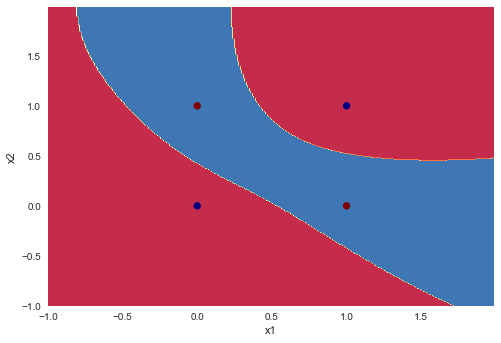

In [110]:
plot_decision_boundary(lambda x : model.predict(x),X,Y)

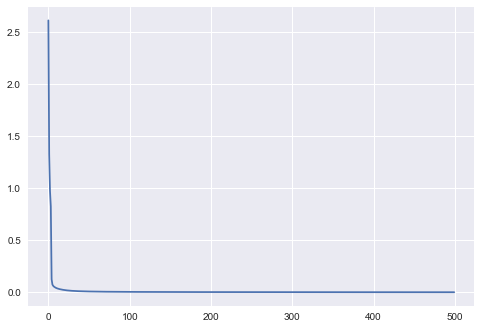

In [111]:
plt.plot(losses)
plt.show()

### Testing On Other Datasets

In [117]:
from sklearn.datasets import make_moons, make_circles, make_classification

In [121]:
def load_dataset(dataset):
    if dataset == 'moon':
        X,Y = make_moons(n_samples = 500, noise = 0.2, random_state = 1)
    elif dataset == 'circles':
        X,Y = make_circles(n_samples = 500,shuffle = True, noise = 0.2, random_state = 1, factor = 0.2)
    elif dataset == 'classification':
        X,Y = make_classification(n_samples = 500, n_classes = 2, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 1)
    else:
        X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
        Y = np.array([0,1,1,0])
        
    return X, Y

training accuracy 1.0000


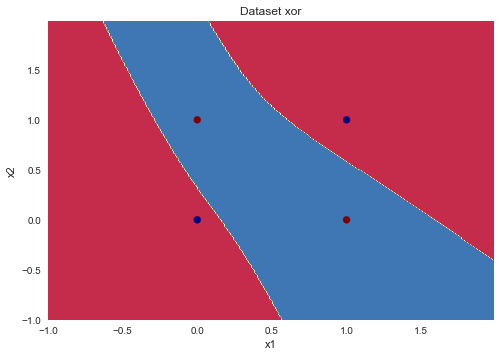

training accuracy 0.9560


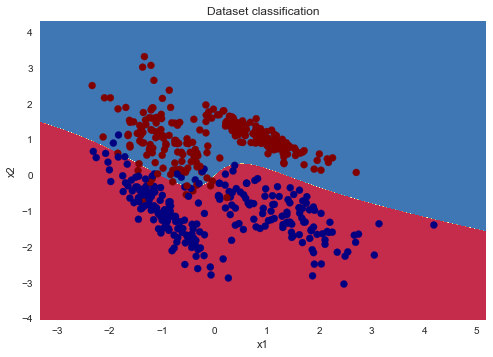

training accuracy 1.0000


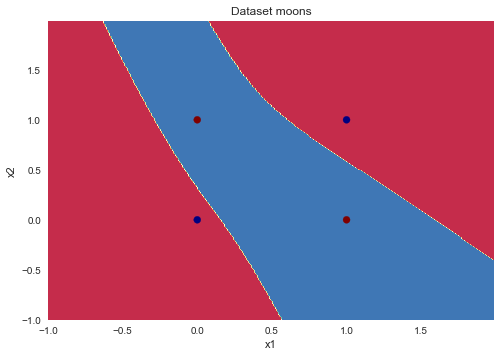

training accuracy 0.9720


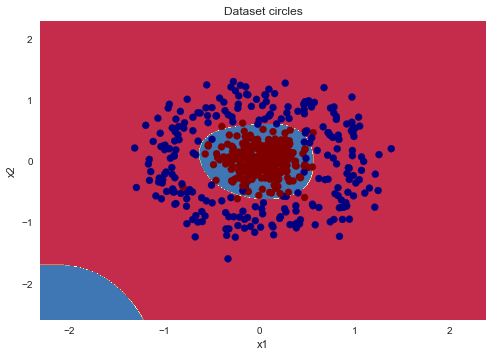

In [126]:
datasets = ['xor', 'classification','moons', 'circles']

for d in datasets:
    model = NeuralNetwork(input_size = 2, layers = [8,3], output_size = 2)
    X,Y  = load_dataset(d)
    train(X,Y, model, 1000, 0.0001, logs = False)
    outputs = model.predict(X)
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("training accuracy %.4f"%training_accuracy)
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x : model.predict(x), X, Y)
    plt.show()
    